In [ ]:
# テストデータやライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

data = pd.read_csv('train.csv')

x_data = data.loc[:,["GrLivArea"]].values
target = data.loc[:,["SalePrice"]].values

x_data_1 = data["GrLivArea"].values
target_1 = data["SalePrice"].values

x_train, x_test, y_train, y_test = train_test_split(x_data, target, train_size=0.8,random_state=42)

#シリーズを変換　
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data_1, target_1, train_size=0.8,random_state=42) 

問題１　仮定関数

In [ ]:
    # # 問題1 仮定関数
    # def _linear_hypothesis(self, x, THETA):
    #     """
    #     線形の仮定関数を計算する
    #     Parameters
    #     ----------
    #     x : 次の形のndarray, shape (n_samples, n_features)
    #     訓練データ
    #     THETA : 次の形のndarray, shape(n_features, 1)
    #     更新されていく重み
    #     Returns
    #     -------
    #     次の形のndarray, shape (n_samples, 1)
    #     線形の仮定関数による推定結果
    #     """
    #     # # 問題１は仮の線形グラフ（一次関数）を引く
    #     theta_fx = THETA.T @ x.T
    #     return theta_fx.reshape(x.shape[0], 1)

問題2　最急降下法

In [ ]:
    # # 問題２　最急降下法
    # def _gradient_descent(self, x, y, THETA):
    #     """
    #     傾きを計算する。
    #     Parameters
    #     ----------
    #     x : 次の形のndarray, shape (n_samples, n_features)
    #     訓練データ
    #     y : 次の形のndarray, shape (n_samples, 1)
    #     目的データ
    #     THETA : 次の形のndarray, shape(n_features, 1)
    #     更新されていく重み
    #     Returns
    #     -------
    #     次の形のndarray, shape (n_samples, 1)
    #     線形の仮定関数による推定結果
    #     """
    #     # trainの行数(転置後のshape[1])分降下式を繰り返す
    #     for j in range(x.shape[1]):
    #       # シグマの中の処理　1
    #       Sigma_1 = self._linear_hypothesis(x, THETA) - y
    #       # xのj番目の列の転置　＠　sigma_1の結果
    #       Sigma_2 = sum(x[:, j].T @ Sigma_1)

    #       THETA[j] = THETA[j] - ((self.lr * 1 / x.shape[0]) * Sigma_2)
    #     # print(f'勾配降下法 結果の確認 : {THETA}')
    #     return THETA
    #         # 問題２
    # def fit(self, x_train, y_train, x_val=None, y_val=None):
    #     """
    #     線形回帰を学習する。
    #     Parameters
    #     ----------
    #     x_train : 次の形のndarray, shape (n_samples, n_features)
    #         訓練データの特徴量
    #     y_train : 次の形のndarray, shape (n_samples, )
    #         訓練データの正解値
    #     x_val : 次の形のndarray, shape (n_samples, n_features)
    #         検証データの特徴量
    #     y_val : 次の形のndarray, shape (n_samples, )
    #         検証データの正解値
    #     """

    #     # テストデータと同じ行数、＋１列のゼロ配列を用意(predictと同じ)
    #     one_column = 1
    #     x_zero_fit = np.zeros((x_train.shape[0], x_train.shape[1] + one_column)) 

    #     for i in range(x_zero_fit.shape[0]):
    #         x_zero_fit[i] = np.append(one_column, x_train[i])
    #     # yのtrainデータをreshape   
    #     y = y_train.reshape(y_train.shape[0], 1)

    #     self.THETA = np.zeros((1, x_zero_fit.shape[1]))
    #     THETA = self.THETA.T
    #     log = np.zeros((self.iter, x_zero_fit.shape[1]))

    #     for i in range(self.iter):
    #         THETA = self._gradient_descent(x_zero_fit, y, THETA)
    #         log[i] = THETA.T
    #         self.THETA = THETA
    #         self.loss[i] = self._loss_func(x_zero_fit, y, THETA)

    #     self.log = log
    #     self.THETA = THETA
    #     self.coef_ = THETA[1]
    #     self.intercept_ = THETA[0]

    #     # x_valの場合　上のコードに_valを足した↓
    #     if type(x_train)==type(x_val):
    #         # テストデータと同じ行数、＋１列のゼロ配列を用意(predictと同じ)
    #         one_column_val = 1
    #         x_zero_val = np.zeros((x_train.shape[0], x_train.shape[1] + one_column_val)) 

    #         for i in range(x_val_fit.shape[0]):
    #             x_zero_val[i] = np.append(one_column_val, x_train[i])
    #         # yのtrainデータをreshape   
    #         y_val = y_val.reshape(y_train.shape[0], 1)

    #         self.THETA = np.zeros((1, x_zero_val.shape[1]))
    #         THETA_val_val = self.THETA_val.T
    #         log_val = np.zeros((self.iter, x_zero_val.shape[1]))

    #         for i in range(self.iter):
    #             THETA_val = self._gradient_descent(x_zero_val, y_val, THETA_val)
    #             log[i] = THETA_val.T
    #             self.THETA_val = THETA_val
    #             self.val_loss[i] = self._loss_func(x_zero_val, y_val, THETA_val)

    #         self.log = log
    #         self.THETA_val = THETA_val
    #         self.coef_ = THETA_val[1]
    #         self.intercept_ = THETA_val[0]


問題３　推定

In [ ]:
# def predict(self, x_test):
#         """
#         線形回帰を使い推定する。
#         Parameters
#         ----------
#         x_test : 次の形のndarray, shape (n_samples, n_features)
#             サンプル
#         Returns
#         -------
#             次の形のndarray, shape (n_samples, 1)
#             線形回帰による推定結果
#         """
        
#         # テストデータと同じ行数、＋１列のゼロ配列を用意(fitと同じ)
#         one_column = 1
#         x_zero = np.zeros((x_test.shape[0], x_test.shape[1] + one_column)) 

#         # x_testの数だけゼロ配列に1を追加
#         count = 0
#         while x_test.shape[0] <= count:
#             x_zero[i] = np.append(one_column, x_test[i])
#             count += 1
#         # while文にした意味はない。可読性が上がるのか試し
        
#         # 推定値
#         y_pred = np.array([])
#         for i in range(x_test.shape[0]):
#             predict_repeat = x_test[i].T @ self.THETA.T
#             y_pred = np.append(y_pred, predict_repeat)
  
#         return y_pred.reshape(y_pred.shape[0], 1)


問題４　平均二乗誤差

In [ ]:
# 問題４
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    #誤差の合計を総数で割る
    diff = ((y_pred - y) ** 2) #推定値と正解値の誤差を二乗する
    mse = sum(diff) / y_pred.shape[0]
    return mse

# a = np.arange(1, 100 )
# b = np.array([10, 20, 30, 40, 50])

sample_1 = np.array([1, 3, 10, 12, 18])
sample_2 = np.array([1, 5, 10, 15, 20])

print('-----平均二乗誤差の判定-----')
print(f'自作の関数で判定 : {MSE(sample_1, sample_2)}')
from sklearn.metrics import mean_squared_error
print(f'sckit-learnで判定 : {mean_squared_error(sample_1, sample_2)}')

-----平均二乗誤差の判定-----
自作の関数で判定 : 3.4
sckit-learnで判定 : 3.4


問題５　目的関数

In [ ]:
    # # 問題５　目的関数（損失関数）
    # def _loss_func(self, x, y, THETA):
    #     """
    #     平均二乗誤差の計算
    #     Parameters
    #     ----------
    #     y_pred : 次の形のndarray, shape (n_samples,)
    #       推定した値
    #     y : 次の形のndarray, shape (n_samples,)
    #       正解値
    #     Returns
    #     ----------
    #     mse : numpy.float
    #       平均二乗誤差
    #     """
    #     # 損失関数を平均二乗誤差によって求める
    #     # 計測した予測値(y_hat)から正解値（y)※実データはy_train、を引いて二乗する。sum関数で総和を求めて
    #     for i in range(x.shape[0]):
    #         y_hat = x[i] @ THETA
    #     loss = ((y_hat - y) ** 2).sum() / (x.shape[0] * 2)
    #     # 二乗する理由→マイナスになることを防ぐために二乗する
    #     return loss

問題６　学習と推定

In [ ]:
# 以下のClassが完成したスクラッチ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLinearRegression():

    def __init__(self, num_iter, lr, no_bias=True, verbose=False):
        """
        線形回帰のスクラッチ実装

        Parameters
        ----------
        num_iter : int
        イテレーション数
        lr : float
        学習率
        no_bias : bool
        バイアス項を入れない場合はTrue
        verbose : bool
        学習過程を出力する場合はTrue

        Attributes
        ----------
        self.coef_ : 次の形のndarray, shape (n_features,)
        パラメータ
        self.loss : 次の形のndarray, shape (self.iter,)
        訓練データに対する損失の記録
        self.val_loss : 次の形のndarray, shape (self.iter,)
        検証データに対する損失の記録
        """
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter) 
        # 損失関数格納用
        self.val_loss = np.zeros(self.iter)

    # 問題1 仮定関数
    def _linear_hypothesis(self, x, THETA):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        x : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        THETA : 次の形のndarray, shape(n_features, 1)
        更新されていく重み
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        # # 問題１は仮の線形グラフ（一次関数）を引く
        theta_fx = THETA.T @ x.T
        return theta_fx.reshape(x.shape[0], 1)
    
    # 問題２　最急降下法
    def _gradient_descent(self, x, y, THETA):
        """
        傾きを計算する。
        Parameters
        ----------
        x : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
        目的データ
        THETA : 次の形のndarray, shape(n_features, 1)
        更新されていく重み
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        # trainの行数(転置後のshape[1])分降下式を繰り返す
        for j in range(x.shape[1]):
          # シグマの中の処理　1
          Sigma_1 = self._linear_hypothesis(x, THETA) - y
          # xのj番目の列の転置　＠　sigma_1の結果
          Sigma_2 = sum(x[:, j].T @ Sigma_1)

          THETA[j] = THETA[j] - ((self.lr * 1 / x.shape[0]) * Sigma_2)
        # print(f'勾配降下法 結果の確認 : {THETA}')
        return THETA

    # 問題２
    def fit(self, x_train, y_train, x_val=None, y_val=None):
        """
        線形回帰を学習する。
        Parameters
        ----------
        x_train : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y_train : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        x_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        # テストデータと同じ行数、＋１列のゼロ配列を用意(predictと同じ)
        one_column = 1
        x_zero_fit = np.zeros((x_train.shape[0], x_train.shape[1] + one_column)) 

        for i in range(x_zero_fit.shape[0]):
            x_zero_fit[i] = np.append(one_column, x_train[i])
        # yのtrainデータをreshape   
        y = y_train.reshape(y_train.shape[0], 1)

        self.THETA = np.zeros((1, x_zero_fit.shape[1]))
        THETA = self.THETA.T
        log = np.zeros((self.iter, x_zero_fit.shape[1]))

        for i in range(self.iter):
            THETA = self._gradient_descent(x_zero_fit, y, THETA)
            log[i] = THETA.T
            self.THETA = THETA
            self.loss[i] = self._loss_func(x_zero_fit, y, THETA)

        self.log = log
        self.THETA = THETA
        self.coef_ = THETA[1]
        self.intercept_ = THETA[0]

        # x_valの場合　上のコードに_valを足した↓
        if type(x_train)==type(x_val):
            # テストデータと同じ行数、＋１列のゼロ配列を用意(predictと同じ)
            one_column_val = 1
            x_zero_val = np.zeros((x_train.shape[0], x_train.shape[1] + one_column_val)) 

            for i in range(x_val_fit.shape[0]):
                x_zero_val[i] = np.append(one_column_val, x_train[i])
            # yのtrainデータをreshape   
            y_val = y_val.reshape(y_train.shape[0], 1)

            self.THETA = np.zeros((1, x_zero_val.shape[1]))
            THETA_val_val = self.THETA_val.T
            log_val = np.zeros((self.iter, x_zero_val.shape[1]))

            for i in range(self.iter):
                THETA_val = self._gradient_descent(x_zero_val, y_val, THETA_val)
                log[i] = THETA_val.T
                self.THETA_val = THETA_val
                self.val_loss[i] = self._loss_func(x_zero_val, y_val, THETA_val)

            self.log = log
            self.THETA_val = THETA_val
            self.coef_ = THETA_val[1]
            self.intercept_ = THETA_val[0]

      
    # 問題５　目的関数（損失関数）
    def _loss_func(self, x, y, THETA):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # 損失関数を平均二乗誤差によって求める
        # 計測した予測値(y_hat)から正解値（y)※実データはy_train、を引いて二乗する。sum関数で総和を求めて
        for i in range(x.shape[0]):
            y_hat = x[i] @ THETA
        loss = ((y_hat - y) ** 2).sum() / (x.shape[0] * 2)
        # 二乗する理由→マイナスになることを防ぐために二乗する
        return loss
    
    # 問題３　推定
    def predict(self, x_test):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        x_test : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # テストデータと同じ行数、＋１列のゼロ配列を用意(fitと同じ)
        one_column = 1
        x_zero = np.zeros((x_test.shape[0], x_test.shape[1] + one_column)) 

        # x_testの数だけゼロ配列に1を追加
        count = 0
        while x_test.shape[0] <= count:
            x_zero[i] = np.append(one_column, x_test[i])
            count += 1
        # while文にした意味はない。可読性が上がるのか試し
        
        # 推定値
        y_pred = np.array([])
        for i in range(x_test.shape[0]):
            predict_repeat = x_test[i].T @ self.THETA.T
            y_pred = np.append(y_pred, predict_repeat)
  
        return y_pred.reshape(y_pred.shape[0], 1)


# 学習結果
mySLR = ScratchLinearRegression(num_iter=40, lr=0.01, verbose=True)
mySLR.fit(x_train, y_train)
print(f'My model Predict index10まで: \n{mySLR.predict(x_test)[:10]}')

My model Predict index10まで: 
[[-2.30366396e+178]
 [-3.89788475e+181]
 [-5.65562445e+178]
 [-9.56952604e+181]
 [-2.21738441e+178]
 [-3.75189656e+181]
 [-3.58922925e+178]
 [-6.07310882e+181]
 [-3.49432174e+178]
 [-5.91252181e+181]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in square


相違点が大きい。predictの数値がおかしい


問題７　学習曲線

coef : 
[-3.64970482e+178]
intersept : 
[-2.15698873e+175]


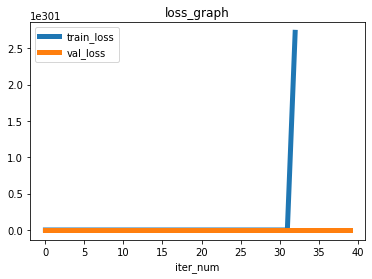

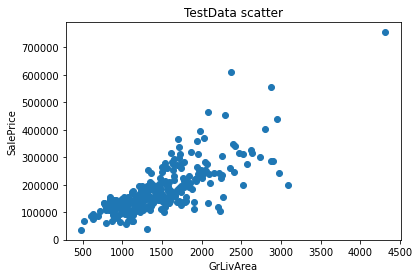

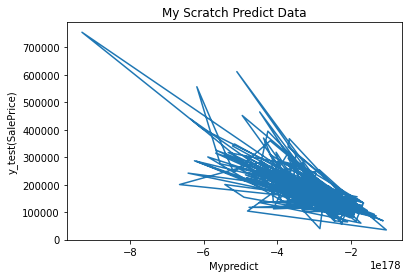

(584,)

In [ ]:

print(f'coef : \n{mySLR.coef_}')
print(f'intersept : \n{mySLR.intercept_}')

# 推定結果のグラフ
plt.title('loss_graph')
plt.xlabel('iter_num')
plt.plot(np.arange(mySLR.iter), mySLR.loss, label='train_loss', linewidth="5")
plt.plot(np.arange(mySLR.iter), mySLR.val_loss, label='val_loss',linewidth="5")
plt.legend()
plt.show()

# 元々の目的変数と説明変数の散布図
plt.title('TestData scatter')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(x_test,y_test)
plt.show()

# Predictデータのshapeをグラフ用に訂正
pre_reshape = mySLR.predict(x_test).reshape(292, 2)

# スクラッチのpredictデータ
plt.title('My Scratch Predict Data')
plt.xlabel('Mypredict')
plt.ylabel('y_test(SalePrice)')
plt.plot(pre_reshape[:,0], y_test)
plt.show()

# 確認
mySLR.predict(x_test).shape
mySLR.predict(x_test)[:,0].shape
# mySLR.predict(x_test)[:,1].shape
# mySLR.predict(x_test).shape


In [ ]:
# 線形回帰　sklearnを使った実装

from sklearn.linear_model import LinearRegression

print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)


clf = LinearRegression()
clf.fit(x_train, y_train)
print(f'predict : \n   {clf.predict(x_test)[0:5]}')
print(f'train-score : \n   {clf.score(x_train, y_train)}') 
print(f'score : \n   {clf.score(x_test, y_test)}')
print(f'coef_ : \n   {clf.coef_}')
print(f'intersept_ : \n   {clf.intercept_}')


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1168, 1)
(1168, 1)
predict : 
   [[134357.9562804 ]
 [293625.79843699]
 [130258.39792373]
 [195441.37579477]
 [190931.86160243]]
train-score : 
   0.483931586143035
score : 
   0.5542632452871117
coef_ : 
   [[102.48895892]]
intersept_ : 
   [24899.74815734]


計算式通りに実装したつもりだが、predictの結果がおかしい